# Import thư viện cần dùng

In [54]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
np.random.seed(18)

# Khởi tạo dữ liệu

Dữ liệu sẽ gồm 3 cụm, mỗi cụm 500 điểm dữ liệu phân bố theo phân phối chuẩn với kỳ vọng lần lượt là (2, 2), (8, 3) và (3, 6); ma trận hiệp phương sai là ma trận đơn vị

In [55]:
N = 500
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X là ma trận hàng các điểm dữ liệu

In [56]:
X0 = np.random.multivariate_normal(mean=means[0], cov= cov, size= N)
X1 = np.random.multivariate_normal(mean=means[1], cov= cov, size= N)
X2 = np.random.multivariate_normal(mean=means[2], cov= cov, size= N)
X = np.concatenate((X0, X1, X2), axis= 0)
print(X)

[[2.07942844 4.19020236]
 [1.86510785 2.16051798]
 [2.44269784 2.62339144]
 ...
 [2.60566241 6.46771143]
 [4.67763675 5.55463181]
 [3.62801566 6.63056534]]


In [57]:
K = 3
original_label = np.asarray([0] * N + [1] * N + [2] * N).T
# Nhãn của mỗi điểm dữ liệu xác định trên hàng tương ứng

# Cài đặt các hàm phụ trợ

## Hàm kmeans_display để hiển thị dữ liệu

In [58]:
def kmeans_display(X, label):
    X0 = X[label == 0, :]  ## Lấy những điểm X thỏa mãn label = 0 (hàng tương ứng trong label = 0)
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    kwargs = {"markersize": 5, "alpha": .8, "markeredgecolor": 'k'}
    plt.plot(X0[:, 0], X0[:, 1], "b^", **kwargs)
    plt.plot(X1[:, 0], X1[:, 1], "go", **kwargs)
    plt.plot(X2[:, 0], X2[:, 1], "rs", **kwargs)

    plt.axis([-3, 14, -2, 10]) #xmin xmax ymin ymax
    plt.axis('scaled')
    plt.plot()
    plt.show()

Hiển thị nhãn ban đầu

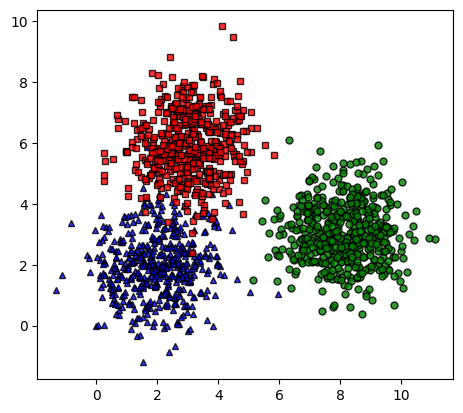

In [59]:
kmeans_display(X, original_label)

## Hàm khởi tạo tâm các cụm ban đầu

In [60]:
# np.random.choice(X.shape[0], K, replace = False)
# chọn ngẫu nhiên K chỉ số từ 0...X.shape[0] - 1; replace = False không cho phép trùng lặp
# Lấy ngẫu nhiên K hàng (K điểm dữ liệu) trong ma trận hàng dữ liệu X làm tâm các cụm ban đầu
def kmeans_init_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace= False)]

## Hàm gán nhãn cho các điểm khi biết tâm các cụm

Đầu vào: 
* Ma trận hàng các điểm dữ liệu X(n_samples, n_features)
* Ma trận hàng các tâm cụm centroids(k_samples, n_features)

Hàm cdist(X, centroids):
* Tính khoảng cách tương ứng của mỗi điểm trong X với mỗi điểm trong centroids
* D(n_samples, k_results) trong đó D[i][j] là khoảng các từ điểm i trong X đến tâm j trong centroids

Hàm np.argmin(D, axis= 1):
* Trả về mảng kích thước (n_samples,) trong đó mỗi phần tử là chỉ số tâm cụm gần nhất, tức chính là nhãn cho phần tử đó
* Tham số axis= 1 chỉ định rằng phép tính được thực hiện qua các cột trong mỗi hàng (theo chiều ngang)

In [61]:
def kmeans_assign_label(X, centroids):
    D = cdist(X, centroids)
    return np.argmin(D, axis= 1)

## Hàm cập nhật tâm các cụm

np.mean(Xk, axis= 0): lấy trung bình Xk qua các hàng (theo chiều dọc)

In [62]:
def kmeans_update_centroids(X, label, K):
    centroids = np.zeros(shape=(K, X.shape[1]))
    for k in range(K):
        Xk = X[label == k, :]
        centroids[k, :] = np.mean(Xk, axis= 0)
    return centroids

## Hàm kiểm tra hội tụ

[tuple(a) for a in centroids]: biến mỗi tâm cụm thành kiểu tuple vì đây là kiểu bất biến và có thể được sử dụng trong tập hợp

In [63]:
def has_converged(centroids, new_centroids):
    return (set([tuple(a) for a in centroids])
            == set([tuple(a) for a in new_centroids]))

# Thành phần chính của K-Means

In [ ]:
def kmeans(X, K):
    # Tạo ngẫu nhiên K tâm cụm
    centroids = [kmeans_init_centroids(X, K)] 
    labels = []
    it = 0
    # Bước lặp
    while True:
        # Gán nhãn cho các điểm dữ liệu vào các cụm gần nhất
        labels.append(kmeans_assign_label(X= X, centroids= centroids[-1]))
        # Cập nhật tâm các cụm
        new_centroids = kmeans_update_centroids(X= X, label= labels[-1], K= K)
        # Kiểm tra điều kiện dừng
        if has_converged(centroids= centroids[-1], new_centroids= new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)
        

# Áp dụng thuật toán

Centers found by algorithm: 
 [[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]


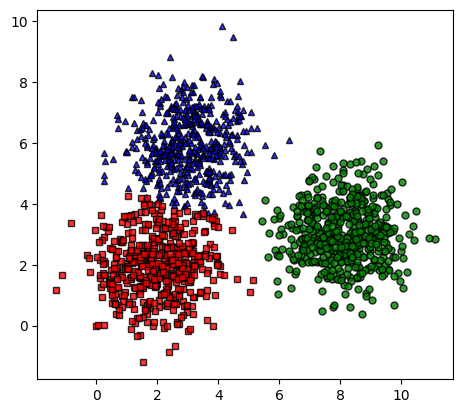

In [65]:
(centroids, labels, it) = kmeans(X, K)
print("Centers found by algorithm: \n", centroids[-1])
kmeans_display(X, labels[-1])

# So sánh kết quả với Scikit-learn

Center found by scikit-learn: 
[[8.07476866 3.01494931]
 [3.02521978 5.94885115]
 [1.98112961 1.95794411]]


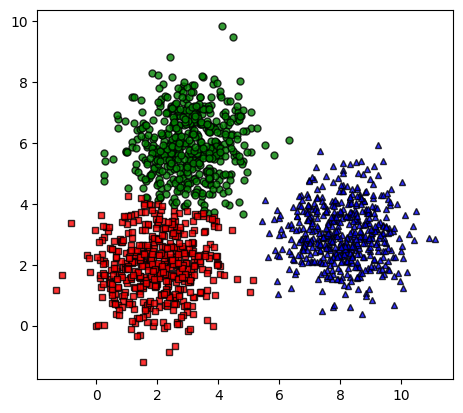

In [66]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 3, random_state= 0).fit(X)
print("Center found by scikit-learn: ")
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label)